In [1]:
using Revise

In [2]:
push!(LOAD_PATH, "/home/amir/work/mps/src/")

using KrylovKit
using SparseArrays
using LinearAlgebra
using Plots
using LaTeXStrings
using FFTW
using LsqFit

using QuantumModels
using MatrixProductStateTools
using ExactDiagonalizationTools
using SymTensors
using GaussianFermions
using GutzwillerMPS

┌ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1273
┌ Info: Precompiling MatrixProductStateTools [top-level]
└ @ Base loading.jl:1273
┌ Info: Precompiling GaussianFermions [top-level]
└ @ Base loading.jl:1273
┌ Info: Precompiling GutzwillerMPS [top-level]
└ @ Base loading.jl:1273


[-0.8914767115530771, -0.5473259801441659, -0.18453671892660473, 0.18453671892660406, 0.5473259801441659]


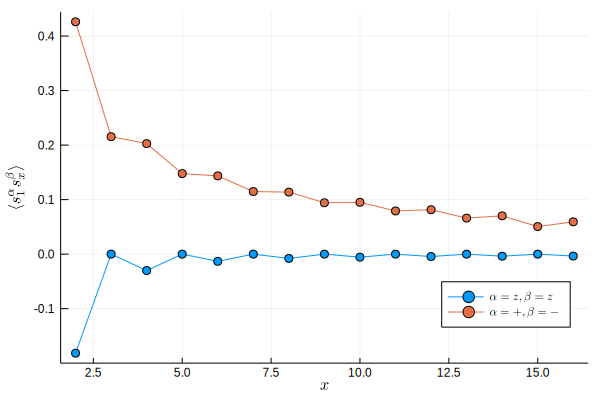

In [3]:
lx=16
L = 1 * lx
m = 20
hamil = generatebdg(triangularhopping((1,lx), 1.0, 1., 1., 1., boundary=(:OBC, :OBC)))
cm = correlationmatrix(hamil, div(L,2))
fgs = corrmat2gmps(cm)
mps = gmps2mps(fgs, m, symmetry=U1)

sz, sp, sm = spinoperators(1/2, symmetry=U1)

fhop_pm = measure(mps, sp, sm)
#fhop_mp = measure(mps, sm, sp)
fhop_zz = measure(mps, sz, sz)
indexes = [(1,l+1) for l=1:lx-1]

p = plot(xaxis=(L"$x$"), yaxis=(L"$\langle s^\alpha_1 s^\beta_x\rangle$"), legend=:bottomright)
plot!(p, [2:lx], [fhop_zz[i] for i in indexes], marker=(:circle), label=L"\alpha=z, \beta=z")
plot!(p, [2:lx], [fhop_pm[i] for i in indexes], marker=(:circle), label=L"\alpha=+, \beta=-")
#plot!(p, [2:lx], [fhop_mp[i] for i in indexes], marker=(:circle), label=L"\alpha=-, \beta=+")

In [4]:
prodmps = GutzwillerMPS._tensorproductzip!(mps, mps, maxdim=400);
#normalize!(gutz1)
gutz2 = zipandgutzwiller!(mps, mps, maxdim=200);

In [ ]:
vne = entanglemententropy(mps)
vne1 = entanglemententropy(prodmps)
#vne2 = entanglemententropy(gutz2);

In [ ]:
plt=plot()
plot!(plt, vne)
plot!(plt, vne1)
#plot!(plt, vne2)

In [ ]:
bonddims(prodmps)

In [ ]:
G = fill(one(Float64), zero(U1),
             (U1Space([-1=>1, 1=>1]),
              dual(U1Space([-1=>1, 0=>2, 1=>1]))
              ))


C = contract(G, (2, -1), prodmps.As[lx], (1, -1, 3))
    

In [ ]:
n=lx-1
A = prodmps.As[n]
C = contract(G, (2, -1), prodmps.As[n], (1, -1, 3))
isrightisometry(fuselegs(C, 2, 2, true))
#isleftisometry(fuselegs(A, 1, 2))

In [ ]:
center_at!(prodmps, 1);


In [ ]:
G

In [ ]:
R = contract(
    contract(prodmps.As[lx], (1, -1, 3), G, (2, -1)), (1, -1, -2), 
    contract(dual(prodmps.As[lx]), (1, -1, 3), G, (2, -1)), (2, -1, -2))

l = lx-1
A = contract(prodmps.As[l], (1, -1, 3), G, (2, -1))
B = contract(prodmps.As[l], (1, -1, 3), G, (2, -1))
R = contract(contract(A, (1,2,-1), R, (-1,3)), (1,-1,-2), B, (2,-1,-2))

l = lx-2
A = contract(prodmps.As[l], (1, -1, 3), G, (2, -1))
B = contract(prodmps.As[l], (1, -1, 3), G, (2, -1))
R = contract(contract(A, (1,2,-1), R, (-1,3)), (1,-1,-2), B, (2,-1,-2))

l = lx-3
A = contract(prodmps.As[l], (1, -1, 3), G, (2, -1))
B = contract(prodmps.As[l], (1, -1, 3), G, (2, -1))
R = contract(contract(A, (1,2,-1), R, (-1,3)), (1,-1,-2), B, (2,-1,-2))